In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from src.data_splitting import *
from src.models import *
from src.preprocessing import *

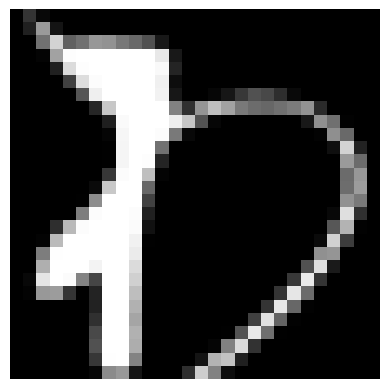

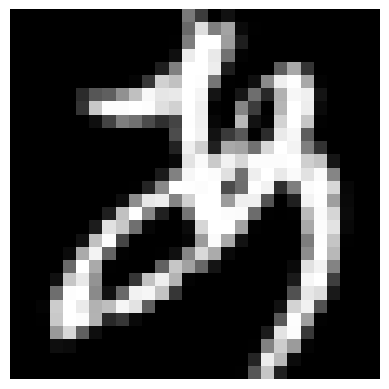

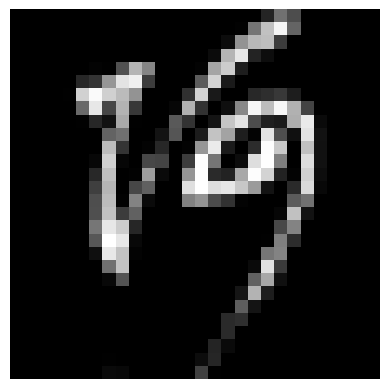

(5000, 784)


In [2]:
X = np.load ("data/X_images.npy")
Y = np.load ("data/y_images.npy")
# X = X / 255
# Y = Y / 255
img1 = X[0].reshape(28 ,28)
img2 = X[1].reshape(28 ,28)
img3 = X[2].reshape(28 ,28)

# Display the image
plt.imshow(img1, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img3, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

print(X.shape)

## Data Splitting

In [3]:
X_norm = X / 255
# Y_encoded = one_hot_encode(Y, 49)
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X_norm,Y)
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05098039 0.08627451 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09019608
 0.53333336 0.88235295 0.76862746 0.00784314 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0627451  0.4627451  0.9529412  1.
 0.6431373  0.         0.         0.         0. 

## M0 train

In [4]:
# hidden_layers = [100,80]
# input_size = X_train.shape[1] # 784
# output_size = 49
# epochs = 100

# x = np.linspace(0, epochs,100)
# print(x)

# m0_NN = NeuralNetwork_M0(input_size, hidden_layers, output_size)

# m0_NN.train(X_train, Y_train, epochs)
# plt.figure(figsize=(10,8))
# plt.plot(x, m0_NN.losses)
# plt.show()



Epoch 0: Train Loss = 4.0056, Val Loss = 3.9983
Epoch 10: Train Loss = 3.7892, Val Loss = 3.8288
Epoch 20: Train Loss = 3.6546, Val Loss = 3.7095
Epoch 30: Train Loss = 3.4951, Val Loss = 3.5686
Epoch 40: Train Loss = 3.3092, Val Loss = 3.4086
Epoch 50: Train Loss = 3.1063, Val Loss = 3.2385
Epoch 60: Train Loss = 2.8986, Val Loss = 3.0629
Epoch 70: Train Loss = 2.6971, Val Loss = 2.8921
Epoch 80: Train Loss = 2.5106, Val Loss = 2.7332
Epoch 90: Train Loss = 2.3453, Val Loss = 2.5935
Epoch 100: Train Loss = 2.2008, Val Loss = 2.4730
Epoch 110: Train Loss = 2.0744, Val Loss = 2.3701
Epoch 120: Train Loss = 1.9649, Val Loss = 2.2833
Epoch 130: Train Loss = 1.8694, Val Loss = 2.2101
Epoch 140: Train Loss = 1.7856, Val Loss = 2.1475
Epoch 150: Train Loss = 1.7115, Val Loss = 2.0939
Epoch 160: Train Loss = 1.6452, Val Loss = 2.0474
Epoch 170: Train Loss = 1.5854, Val Loss = 2.0077
Epoch 180: Train Loss = 1.5310, Val Loss = 1.9737
Epoch 190: Train Loss = 1.4813, Val Loss = 1.9435
Epoch 200: 

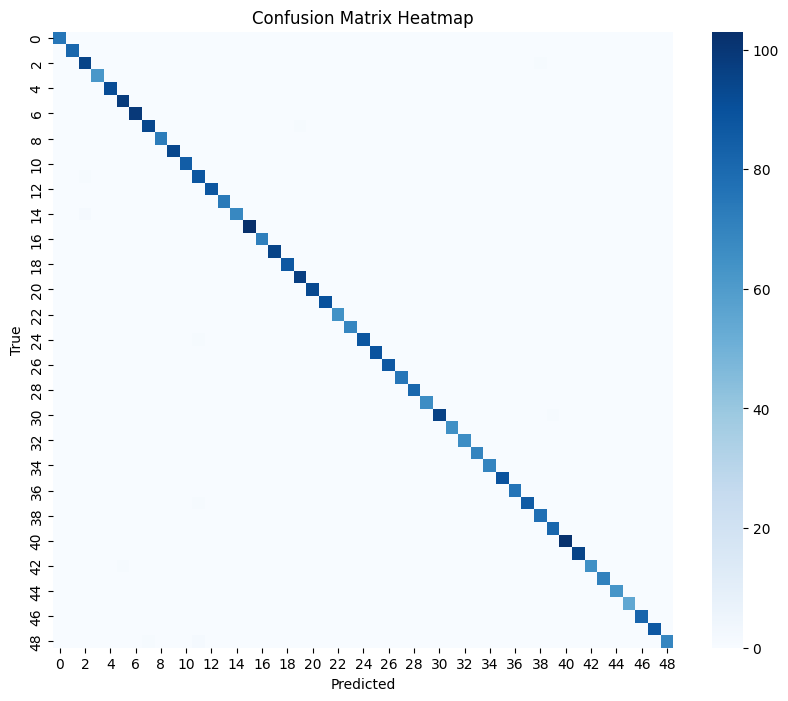


Evaluación en Validation:
Accuracy: 0.6100, Loss: 2.1915


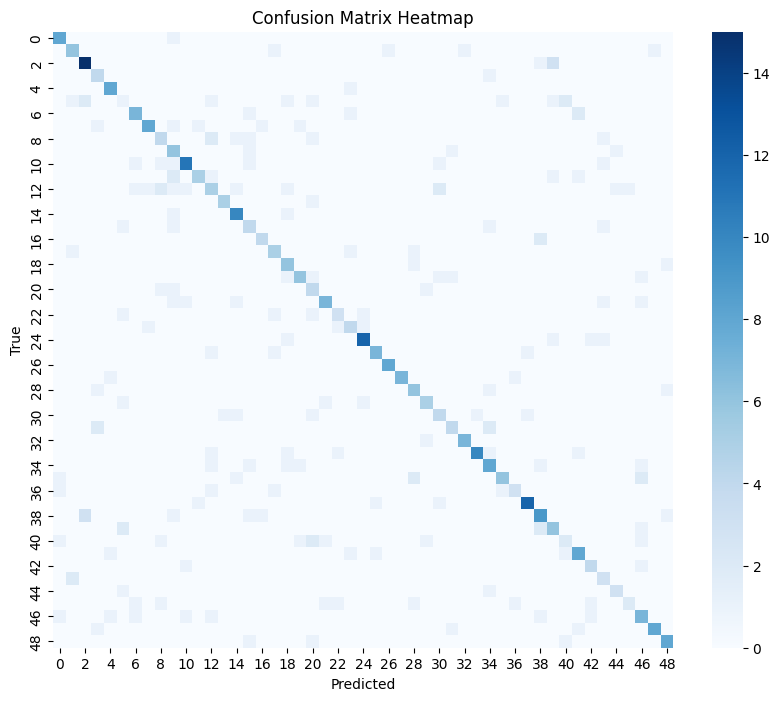

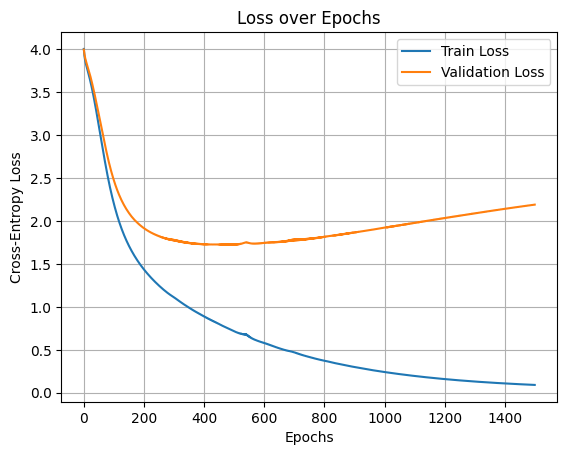

In [9]:
input_size = 784  # Number of features
hidden_layers = [100, 80]  # Two hidden layers
output_size = 49  # 49 classes
learning_rate = 0.01
epochs = 100
num_classes = 49

# One-hot encode labels
Y_train_one_hot = one_hot_encode(Y_train, num_classes)  # Shape (4000, 49)
Y_val_one_hot = one_hot_encode(Y_val, num_classes)  # Shape (1000, 49)

# # Create and train network
# nn = NeuralNetwork(input_size, hidden_layers, output_size, learning_rate)
# nn.train(X_train, Y_train_one_hot, X_val, Y_val_one_hot, epochs, num_classes)

# # Plot losses
# nn.plot_losses(epochs)

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)